### JEST internal workshop &#8594; Intro to OpenCV (Crash Course)  # 4/4

[Return to OpenCV fundamentals](introOpenCV.ipynb)  
[Return to edge detection](edgeDetection.ipynb)  
[Return to cascade classifier](cascade.ipynb)

#### 4. Traffic light detector
Estimated time needed: **15 min**

In [1]:
import cv2 # opencv
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab # control figure size 
pylab.rcParams['figure.figsize'] = (10, 8)

In [2]:
# download images

!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/trafficLights/1.jpg \
    -O img/trafficLights/1.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/trafficLights/1.jpg \
    -O img/trafficLights/2.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/trafficLights/1.jpg \
    -O img/trafficLights/3.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/trafficLights/1.jpg \
    -O img/trafficLights/4.jpg
    
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/trafficLights/1.jpg \
    -O img/trafficLights/5.jpg


--2021-09-19 14:08:35--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/students.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633402 (619K) [image/jpeg]
Saving to: ‘img/students.jpg’

img/students.jpg    100%[===================>] 618,56K  3,72MB/s    in 0,2s    

2021-09-19 14:08:36 (3,72 MB/s) - ‘img/students.jpg’ saved [633402/633402]

--2021-09-19 14:08:36--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/coimbra.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710131 (693K) [ima

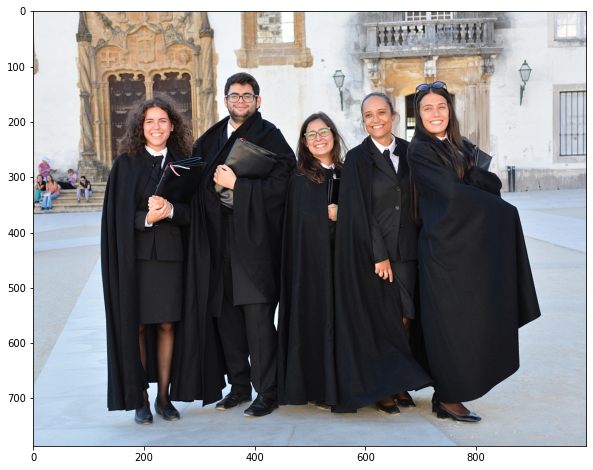

In [3]:
# brase image (students)
students=cv2.imread('img/students.jpg')
gray_students = cv2.cvtColor(students, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(students, cv2.COLOR_BGR2RGB))


In [4]:
# you can download cascade files (https://github.com/opencv/opencv/tree/master/data/haarcascades)

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
body_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
smile_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

### Detecting faces

Detected 5 faces!


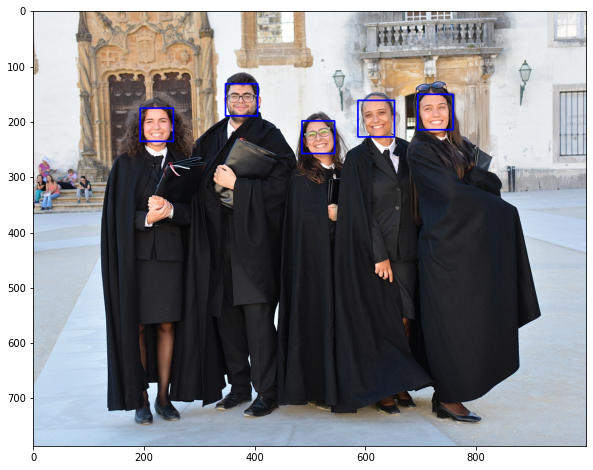

In [20]:
faces = face_classifier.detectMultiScale(
    gray_students, # input image
    scaleFactor = 1.1,
    minNeighbors = 4
)

for (x, y, w, h) in faces:
    cv2.rectangle(students, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(students, cv2.COLOR_BGR2RGB))
print(f"Detected {len(faces)} faces!")

### Detecting smiles

Detected 11 smiles!


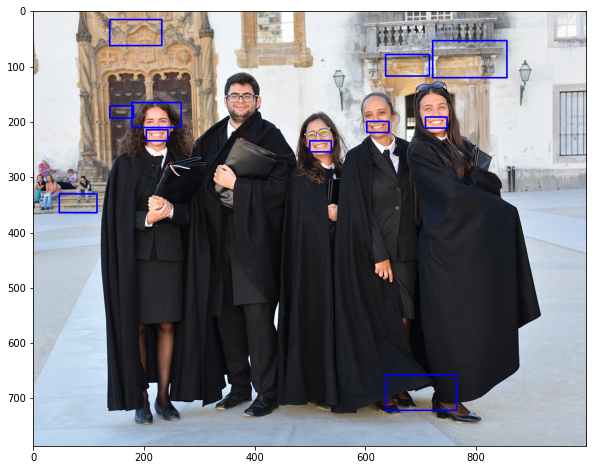

In [19]:
students2=cv2.imread('img/students.jpg')
smiles = smile_classifier.detectMultiScale(
    gray_students, # input image
    scaleFactor = 1.2,
    minNeighbors = 20
)

for (x, y, w, h) in smiles:
    cv2.rectangle(students2, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(students2, cv2.COLOR_BGR2RGB))
print(f"Detected {len(smiles)} smiles!")

### 3 true positives and 8 false positives

### How to improve this algorithm?

What if we only detect smiles on faces?

Detected 4 smiles!


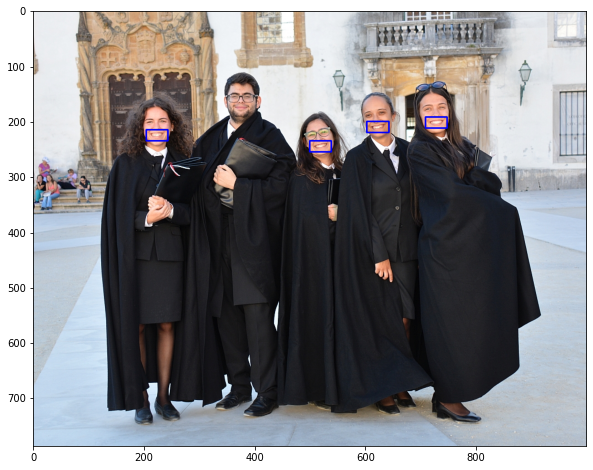

In [18]:
students3=cv2.imread('img/students.jpg')
real_smile = 0
for (x, y, w, h) in faces:
    for (x_s, y_s, w_s, h_s) in smiles:
        if( (x <= x_s) and (y <= y_s) and ( x + w >= x_s + w_s) and ( y + h >= y_s + h_s)):
            cv2.rectangle(students3, (x_s, y_s),(x_s + w_s, y_s + h_s),(255, 0, 0), 2)
            real_smile += 1
            
plt.imshow(cv2.cvtColor(students3, cv2.COLOR_BGR2RGB))
print(f"Detected {real_smile} smiles!")


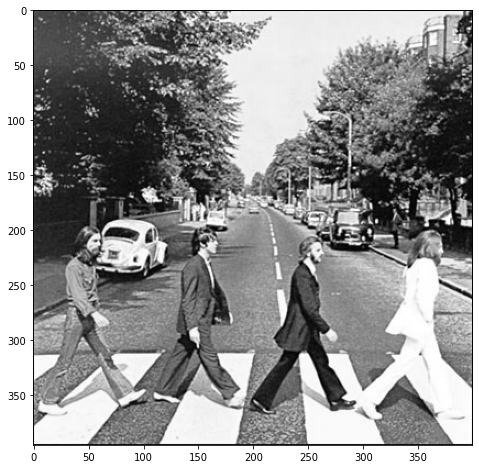

In [8]:
# base image (abbey road)
abbey_road=cv2.imread('img/abbey_road.jpg')
gray_abbey_road = cv2.cvtColor(abbey_road, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_abbey_road, cv2.COLOR_BGR2RGB))

Detected 0 people!


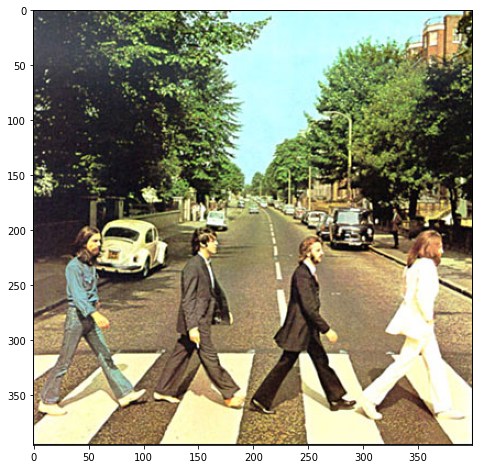

In [22]:
# Detecting beattles

beattles = body_classifier.detectMultiScale(
    gray_abbey_road, # input image
    scaleFactor = 1.2,
    minNeighbors = 3
)

for (x, y, w, h) in beattles:
    cv2.rectangle(abbey_road, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(abbey_road, cv2.COLOR_BGR2RGB))
print(f"Detected {len(beattles)} people!")

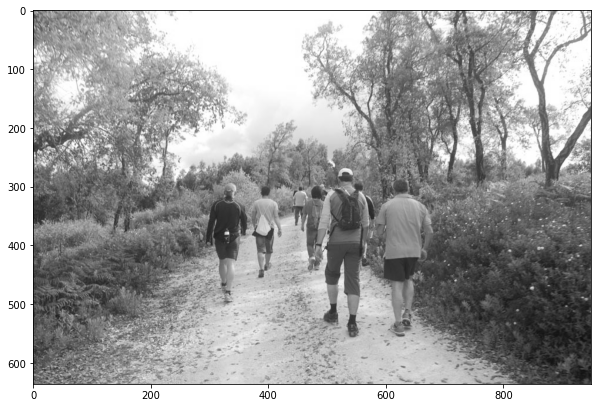

In [10]:
# base image (abbey road)
pedestrian=cv2.imread('img/pedestrian.jpg')
gray_pedestrian = cv2.cvtColor(pedestrian, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_pedestrian, cv2.COLOR_BGR2RGB))

Detected 2 people!


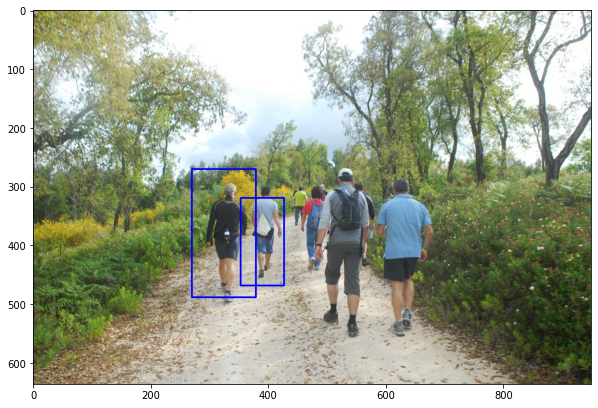

In [23]:
# Detecting pedestrians

pedestrians = body_classifier.detectMultiScale(
    gray_pedestrian, # input image
    scaleFactor = 1.15,
    minNeighbors = 2
)

for (x, y, w, h) in pedestrians:
    cv2.rectangle(pedestrian, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(pedestrian, cv2.COLOR_BGR2RGB))
print(f"Detected {len(pedestrians)} people!")

### Bad results. This also shows the limitation of the method.

### Note. By calibrating the parameters better results can be found.

[Go to traffic light detection](trafficLightDetection.ipynb)

### References:

Source 1: https://github.com/HevLfreis/TrafficLight-Detector

Source 2: https://stackoverflow.com/questions/58109962/how-to-optimize-circle-detection-with-python-opencv